### Logistic Regression. Maşın öyrənməsinə ehtimallar baxımından yanaşma

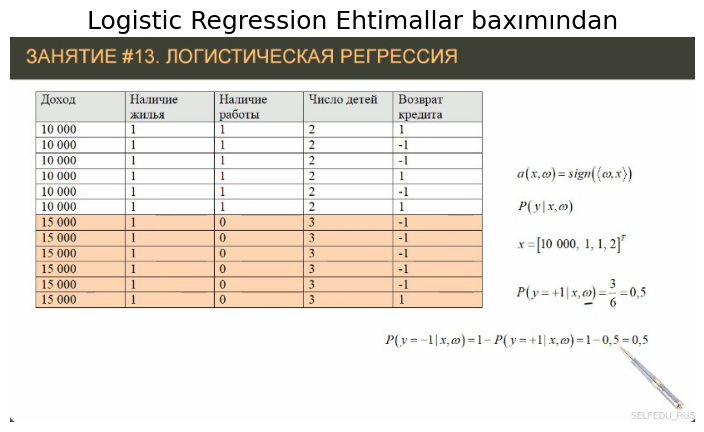

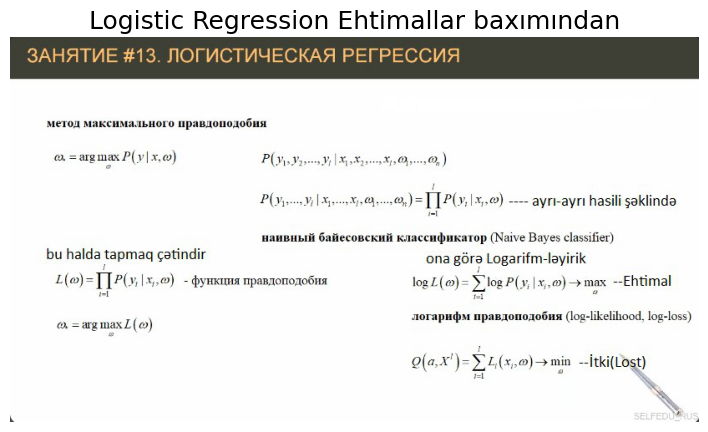

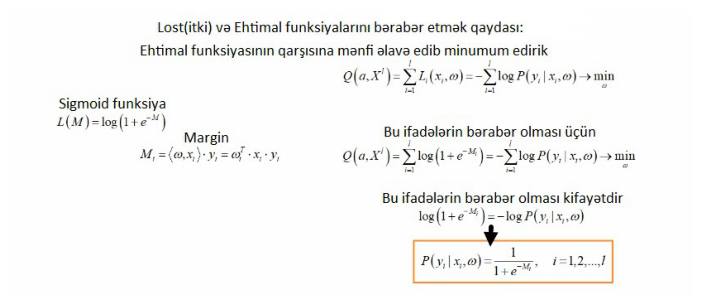

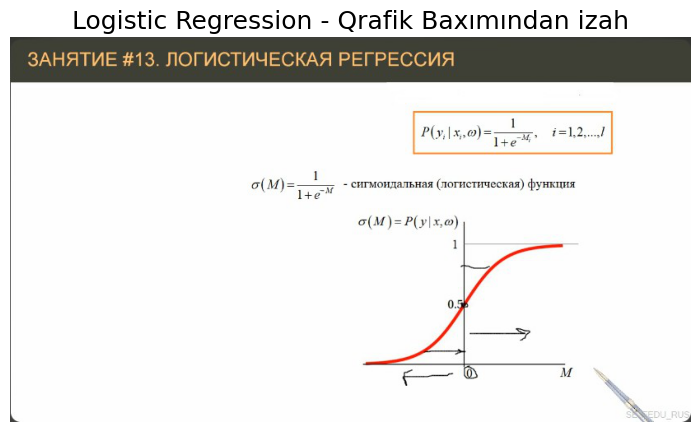

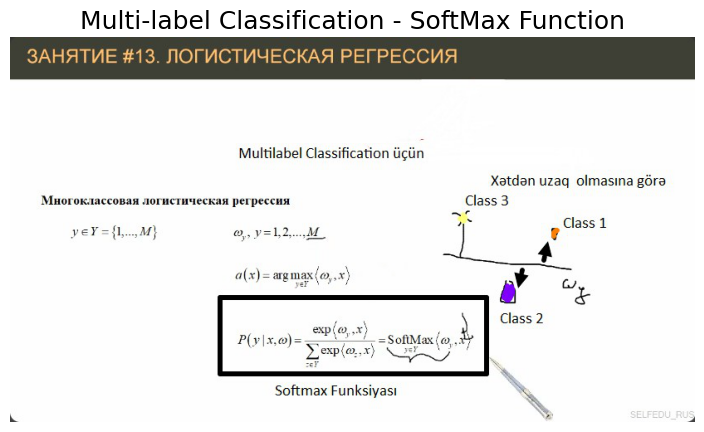

In [18]:
from PIL import Image

# Fayl yolunun əsas hissəsi
base_path = r'C:\Users\dell\Desktop\Selfedu\Pictures\ML_13_'

# Şəkilləri saxlayacağımız siyahı
image_list = []

# 1-dən 5-ə qədər olan şəkilləri dövr ilə açırıq
for i in range(1, 6):  # 1-dən 5-ə qədər
    full_path = f'{base_path}{i}.jpg'  # Fayl yolunu dinamik olaraq yaradırıq
    img = Image.open(full_path)
    image_list.append(img)  # Şəkili siyahıya əlavə edirik

# Nəticə: images siyahısında bütün yüklənmiş şəkillər olacaq

import matplotlib.pyplot as plt

# Şəkilləri göstərin
for i, image in enumerate(image_list):
    if i == 2:
        plt.figure(figsize=(8.8, 4))        
    else:     
        plt.figure(figsize=(25, 5))  # Şəkilin ölçüsü    
        
    if i < 2:
        plt.title("""Logistic Regression Ehtimallar baxımından""", size='18')
    elif i < 3:
        plt.title("""""", size='18')
    elif i < 4:
        plt.title("""Logistic Regression - Qrafik Baxımından izah""", size='18')
    elif i < 5:
        plt.title("""Multi-label Classification - SoftMax Function""", size='18')         

    plt.imshow(image)
    plt.axis('off')  # Oxları gizlətmək üçün
    plt.show()

### Sigmoid Funksiyasının alınma qaydası

#### 1️⃣ Başlanğıc düsturlar

$$
\log L(\omega) = \sum_{i=1}^l \log P(y_i\mid x_i,\omega) \longrightarrow \max - \ Ehtimal \ Function
$$

$$
Q(a,X^l)=\sum_{i=1}^l \log(1+e^{-M_i}) \longrightarrow \min - \ Loss \ Function
$$

#### Loss və Ehtimal Funksiyalarını bərabər etmək qaydası:

$$
Q(a,X^l)=\sum_{i=1}^l \log(1+e^{-M_i}) = - \sum_{i=1}^l \log P(y_i\mid x_i,\omega) \longrightarrow \min
$$

və bu ifadə **log-likelihood** formasında yazılır:
$$
\sum_{i=1}^l \log(1+e^{-M_i})
= - \sum_{i=1}^l \log P(y_i\mid x_i,\omega)
$$

Buradan **bir müşahidə üçün**:
$$
\log(1+e^{-M_i}) = -\log P(y_i\mid x_i,\omega)
$$

---

#### 2️⃣ Logu aradan qaldıraq

Hər iki tərəfin eksponentini alaq:

Yəni hər iki tərəfə $e^{(\cdot)}$ tətbiq edirik:
$$
e^{\log(1+e^{-M_i})} = e^{-\log P(y_i \mid x_i,\omega)}
$$

$$
e^{\log a} = a
$$

$$
e^{-\log P} = \frac{1}{e^{\log P}} = \frac{1}{P}
$$

$$
1+e^{-M_i} = \frac{1}{P(y_i \mid x_i,\omega)}
$$


---

#### 3️⃣ Ehtimalı tək buraxaq

$$
P(y_i\mid x_i,\omega)
= \frac{1}{1+e^{-M_i}}
$$

---

#### 4️⃣ Nəticə (sigmoid funksiyası)

$$
\boxed{
P(y_i\mid x_i,\omega)=\frac{1}{1+e^{-M_i}},
\quad i=1,2,\dots,l
}
$$

---

#### 🔹 Niyə bu alınır?

Çünki **logistic regression**-da ehtimal **sigmoid funksiyası** ilə modelləşdirilir və
$$
\log(1+e^{-M})
$$
ifadəsi **Bernoulli paylanmasının mənfi log-likelihood**-udur.


### Qrafik Baxımndan İzah

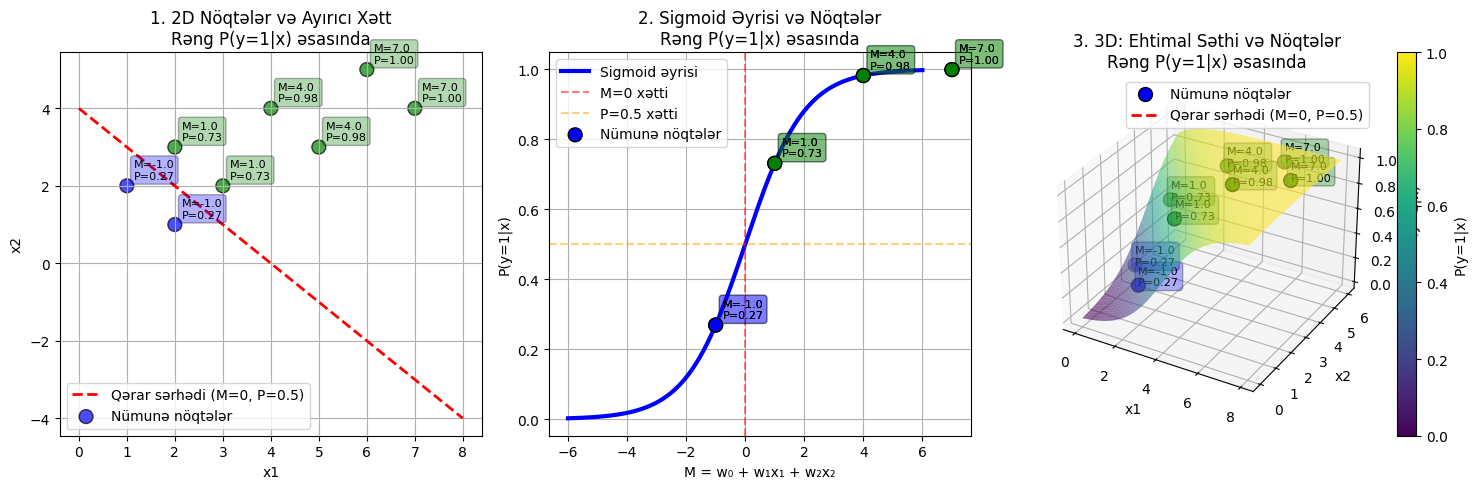

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# --- Nümunə məlumatlar ---
X = np.array([[1,2],[2,1],[2,3],[3,2],[4,4],[5,3],[6,5],[7,4]])
y = np.array([0,0,0,0,1,1,1,1])

# --- Logistic regression parametrləri ---
w = np.array([-4, 1, 1])  # w0, w1, w2

# Xətti model
M = w[0] + w[1]*X[:,0] + w[2]*X[:,1]

# Sigmoid funksiyası
def sigmoid(M):
    return 1 / (1 + np.exp(-M))

P = sigmoid(M)

# --- Rəngləri P(y=1|x) əsasında təyin edək ---
colors_P = ['blue' if p < 0.5 else 'green' for p in P]

# --- 1. 2D Görüntü: Nöqtələr və ayırıcı xətt ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
x1_vals = np.linspace(0, 8, 100)
x2_vals = (-w[0] - w[1]*x1_vals)/w[2]
plt.plot(x1_vals, x2_vals, 'r--', linewidth=2, label='Qərar sərhədi (M=0, P=0.5)')

plt.scatter(X[:,0], X[:,1], c=colors_P, s=100, edgecolor='k', alpha=0.7, label='Nümunə nöqtələr')

# Nöqtələrin yanında M və P dəyərlərini göstərək
for i in range(len(X)):
    plt.annotate(f'M={M[i]:.1f}\nP={P[i]:.2f}', 
                 (X[i,0], X[i,1]),
                 xytext=(5,5), textcoords='offset points',
                 fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors_P[i], alpha=0.3))

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("1. 2D Nöqtələr və Ayırıcı Xətt\nRəng P(y=1|x) əsasında")
plt.legend()
plt.grid(True)

# --- 2. Sigmoid əyrisi ---
plt.subplot(1, 3, 2)
M_range = np.linspace(-6, 6, 200)
P_range = sigmoid(M_range)
plt.plot(M_range, P_range, 'b-', linewidth=3, label='Sigmoid əyrisi')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='M=0 xətti')
plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.5, label='P=0.5 xətti')
plt.scatter(M, P, c=colors_P, s=100, edgecolor='k', zorder=5, label='Nümunə nöqtələr')

# Nöqtələrin yanında M və P dəyərlərini göstərək
for i in range(len(X)):
    plt.annotate(f'M={M[i]:.1f}\nP={P[i]:.2f}', 
                 (M[i], P[i]),
                 xytext=(5,5), textcoords='offset points',
                 fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors_P[i], alpha=0.3))

plt.xlabel("M = w₀ + w₁x₁ + w₂x₂")
plt.ylabel("P(y=1|x)")
plt.title("2. Sigmoid Əyrisi və Nöqtələr\nRəng P(y=1|x) əsasında")
plt.legend()
plt.grid(True)

# --- 3. 3D Görüntü ---
plt.subplot(1, 3, 3, projection='3d')
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 8, 50), np.linspace(0, 6, 50))
M_grid = w[0] + w[1]*x1_grid + w[2]*x2_grid
P_grid = sigmoid(M_grid)
surf = plt.gca().plot_surface(x1_grid, x2_grid, P_grid, cmap='viridis', alpha=0.6, edgecolor='none', label='Ehtimal səthi (P(y=1|x))')

# Nöqtələr
plt.gca().scatter(X[:,0], X[:,1], P, c=colors_P, s=100, edgecolor='k', depthshade=True, label='Nümunə nöqtələr')

# Nöqtələrin yanında M və P dəyərlərini göstərək
for i in range(len(X)):
    plt.gca().text(X[i,0], X[i,1], P[i], f'M={M[i]:.1f}\nP={P[i]:.2f}', 
                   fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors_P[i], alpha=0.3))

plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set_zlabel("P(y=1|x)")
plt.title("3. 3D: Ehtimal Səthi və Nöqtələr\nRəng P(y=1|x) əsasında")
plt.colorbar(ScalarMappable(cmap='viridis'), ax=plt.gca(), label='P(y=1|x)')
# 3D-də legend işləməsi üçün əlinlə yaratmaq olar
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Nümunə nöqtələr',
                          markerfacecolor='blue', markersize=10, markeredgecolor='k'),
                   Line2D([0], [0], color='r', lw=2, linestyle='--', label='Qərar sərhədi (M=0, P=0.5)')]
plt.gca().legend(handles=legend_elements)

plt.tight_layout()
plt.show()

#### **Qrafik 1: 2D Nöqtələr və Ayırıcı Xətt**

* **X1 və X2 oxları:** Nümunələrin iki xüsusiyyətini göstərir.
* **Nöqtələr:**

  * **Mavi nöqtələr:** `y=0` sinifi.
  * **Yaşıl nöqtələr:** `y=1` sinifi.
* **Qırmızı kəsik xətt:**

  * Bu **logistic regression ayırıcı xəttidir**.
  * `M = 0` xətti əsasında çəkilib (`M = w0 + w1*x1 + w2*x2`), yəni **x-dəyərləri üçün xətti modelin çıxışı 0 olduqda bu xətt yaranır**.
  * Logistic regression-da `M=0` xətti **P(y=1|x) = 0.5** ehtimalına bərabərdir. Yəni, bu xətt sinifləri bölür: sol tərəf `y=0` daha ehtimal, sağ tərəf `y=1` daha ehtimal.
* **M və P etiketləri:** Hər nöqtənin üstündə `M` (xətti modelin çıxışı) və `P` (sigmoid ehtimalı) göstərilib.

**Nəticə:** Nöqtələr `M` və `P`-yə görə siniflərlə uyğun düşür: mavi nöqtələr aşağı P, yaşıl nöqtələr isə yüksək P ehtimallıdır.

---

#### **Qrafik 2: Sigmoid Əyrisi və Nöqtələr**

* **X oxu:** `M = w0 + w1*x1 + w2*x2` (xətti modelin çıxışı)
* **Y oxu:** `P(y=1|x)` ehtimalı (`sigmoid(M)`)
* **Qırmızı şaquli xətt (M=0):**

  * Xətti modelin qərar həddi.
  * `M=0` → `P=0.5`
* **Narıncı üfüqi xətt (P=0.5):** Logistic regression-un 50% ehtimal xətti
* **Mavi/yaşıl nöqtələr:** Hər bir nümunənin `M`-dəki nöqtəsi və `P`-dəki ehtimalı.
* **Sigmoid əyrisi:**

  * Xətti modelin çıxışını ehtimala çevirir.
  * Məqsəd: `M`-in kiçik/ mənfi dəyərləri `P ≈ 0`, böyük/müsbət dəyərləri `P ≈ 1` ilə təmsil etsin.

**İzah:**

* Nöqtələr sigmoid əyrisindəki yerinə görə siniflərlə uyğun gəlir: `P<0.5` → `y=0`, `P>0.5` → `y=1`.

---

#### **Qrafik 3: 3D Ehtimal Səthi və Nöqtələr**

* **X oxları:** `x1` və `x2`
* **Y oxu:** `P(y=1|x)` (sigmoid ehtimalı)
* **Səth:** Logistic regression modelinin ehtimal səthi

  * Səthin rəngi ehtimal dəyərlərini göstərir (0-dan 1-ə)
  * Yüksək səth → `y=1` ehtimalı yüksək
  * Aşağı səth → `y=0` ehtimalı yüksək
* **Qırmızı xətt:** `M=0`, yəni `P=0.5` qərar sərhədi
* **Nöqtələr:** Hər nümunənin `(x1, x2, P)` koordinatları

  * Mavi → `y=0`
  * Yaşıl → `y=1`

**İzah:**

* Bu 3D qrafik **siniflərin logistika modeli tərəfindən necə ehtimallara çevrildiyini vizual göstərir**.
* Hər nöqtə səth üzərindəki `P(y=1|x)` dəyəri ilə uyğun gəlir.

---

#### **Xülasə**

| Element                 | Təsviri                                         |    |
| ----------------------- | ----------------------------------------------- | -- |
| **M=0 xətti (qırmızı)** | Logistic regression-un qərar sərhədi; P=0.5     |    |
| **Sigmoid əyrisi**      | Xətti modelin çıxışını ehtimala çevirir; P(y=1  | x) |
| **Nöqtələr**            | Siniflərə uyğun rənglənmiş: mavi y=0, yaşıl y=1 |    |
| **M və P etiketləri**   | Hər nöqtənin xətti model çıxışı və ehtimalı     |    |

**Niyə nöqtələr həmin sinifə düşür?**

* `P > 0.5` → y=1 (yaşıl)
* `P < 0.5` → y=0 (mavi)
* `M`-in işarəsi və sigmoid ehtimalı nöqtənin sinifini təyin edir.

---

Əgər istəyirsənsə, mən sənə **bu 3 vizualı birləşdirib addım-addım izah edən animasiyalı qrafik** də yaza bilərəm ki, daha intuitiv başa düşəsən.

Sən bunu istəyirsən?


### $Threshold = 0.7$ etsək - Qrafik Baxımından İzah

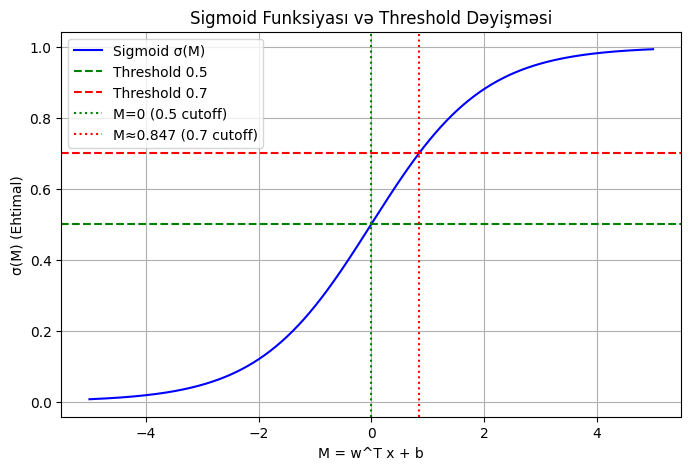

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# M dəyərləri (xətti funksiya çıxışları)
M = np.linspace(-5, 5, 400)

# Sigmoid funksiyası
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sig = sigmoid(M)

# Threshold-lar
threshold_0_5 = 0.5
threshold_0_7 = 0.7

# M üçün threshold-un tərsi
M_thresh_0_7 = np.log(0.7/0.3)  # ≈ 0.847

# Qrafik
plt.figure(figsize=(8,5))
plt.plot(M, sig, label='Sigmoid σ(M)', color='blue')
plt.axhline(y=threshold_0_5, color='green', linestyle='--', label='Threshold 0.5')
plt.axhline(y=threshold_0_7, color='red', linestyle='--', label='Threshold 0.7')
plt.axvline(x=0, color='green', linestyle=':', label='M=0 (0.5 cutoff)')
plt.axvline(x=M_thresh_0_7, color='red', linestyle=':', label=f'M≈0.847 (0.7 cutoff)')

plt.title("Sigmoid Funksiyası və Threshold Dəyişməsi")
plt.xlabel("M = w^T x + b")
plt.ylabel("σ(M) (Ehtimal)")
plt.legend()
plt.grid(True)
plt.show()

#### 🔹 İzahı qrafik üzrə:

1. **Mavi əyrisi** → sigmoid funksiyası
2. **Yaşıl xətt** → 0.5 threshold (standart)
3. **Yaşıl dik xətt** → M=0, normal decision boundary
4. **Qırmızı xətt** → 0.7 threshold
5. **Qırmızı dik xətt** → M ≈ 0.847, yeni decision boundary

💡 Görürsən ki, **threshold-u artıranda**, “cutoff” nöqtəsi **xətti funksiyada sağa sürüşür**. Sigmoid özü dəyişmir, sadəcə hansı M dəyərində “1” qərarı verəcəyimiz dəyişir.

---

#### 1️⃣ Əsas məqam

* Logistic regression-də **sigmoid funksiyası**:

$$
\sigma(M) = \frac{1}{1 + e^{-M}}
$$

* Normalda **decision threshold = 0.5**:

  * $\sigma(M) \ge 0.5 \Rightarrow y = 1$
  * $\sigma(M) < 0.5 \Rightarrow y = 0$

* Bu o deməkdir ki, $M=0$ xətti **sigmoid(0) = 0.5**-də kəsir.

---

#### 2️⃣ Threshold-u 0.7 etmək istəyirsən

Əgər ehtimal (P) verilibsə, yəni:

$$
\sigma(M) = P
$$

biz istəyirik **M-i tapmaq**.

$$
P = \frac{1}{1 + e^{-M}}
$$

1. Tənliyi tərs çevirək:

$$
1 + e^{-M} = \frac{1}{P}
$$

$$
e^{-M} = \frac{1}{P} - 1
$$

$$
e^{-M} = \frac{1-P}{P}
$$

2. Hər iki tərəfə **ln** tətbiq edək:

$$
-M = \ln\frac{1-P}{P}
$$

$$
M = - \ln\frac{1-P}{P} = \ln\frac{P}{1-P}
$$

✅ Və budur:

$$
\boxed{M = \ln \frac{P}{1-P}}
$$

Bu **logit funksiyasıdır**: ehtimalı $M$ xətti modelinə çevirir.



* İndi desək ki, **y = 1** demək üçün ehtimal minimum 0.7 olmalıdır:

$$
\sigma(M) = P \ge 0.7
$$

* Sigmoid tərsini götürək:

$$
M = \ln\frac{P}{1-P} = \ln\frac{0.7}{0.3} \approx 0.847
$$

✅ Yəni, əgər threshold = 0.7dirsə, **decision boundary (M=0.847)** olacaq, yox M=0.

---

#### 3️⃣ Nəticə

* **Sigmoid funksiyasını dəyişmək lazım deyil!**

* Sadəcə **decision threshold**-u 0.5-dən 0.7-yə dəyişirsən.

* Bu o deməkdir ki, xətti modeldə M-nin kəsdiyi nöqtə artıq 0 deyil, $ \approx 0.847 $ olacaq.

* Vizual olaraq: xətti xətt “0-dan” deyil, **0.847-dən** keçəcək ki, sigmoid dəyəri 0.7 olsun.

---

💡 Qısa xülasə:

* Sigmoid **ehtimalları dəyişdirmir**.
* **Threshold-u** dəyişirsən → M xətti sərhədin dəyişikliyini tələb edir.
* M=0 artıq “0.7 cutoff” üçün kəsik nöqtəsi deyil.

### Logistic Regression


#### 🔍 **1. Logistic Regression nədir?**

- **Logistic Regression** — **klassik Supervised Learning** metodudur, **Classification (təsnifat)** üçün istifadə olunur.  
- **Məqsədi**: Giriş dəyişənləri (X) əsasında **çıxışın ehtimalını (probability)** tapmaq → çıxış ya **0**, ya da **1** (və ya birdən çox sinif).

>**Tərif:** Tərif: Logistik Regressiya, təsnifat problemlərini həll etmək üçün geniş istifadə olunan statistik və maşın öyrənmə metodudur. **Əsas məqsəd müstəqil dəyişənlər (features) ilə ikili və ya çoxlu sinifli hədəf dəyişəni (target) arasında əlaqəni modelləşdirmək və sinif ehtimallarını proqnozlaşdırmaqdır. Adı "regressiya" olsa da, təsnifat üçün istifadə edilir.**



>**Tərif:** **Logistic Regression** **giriş dəyişənləri** əsasında hadisənin baş vermə ehtimalını **sigmoid funksiyası** ilə hesablayan və bu **ehtimal** üzərindən iki və ya daha çox **sinfi** ayırd edən statistik klassifikasiya modelidir.

---

#### 🧮 **2. Predict funksiyası nədir, necə işləyir?**

#### ⚙️ Məntiq:  
Əvvəlcə linear kombinasiya hesablanır:  
$$
M = w^T x + b = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n = X \cdot W
$$

* $x$ — input xüsusiyyətləri (feature) vektoru
* $w$ — ağırlıqlar (weights)
* $b$ — bias (sabit)

Sonra bu nəticəyə **sigmoid funksiyası** tətbiq olunur:  
Yəni, Logistic regression xətti funksiyanın çıxışını **sigmoid funksiyasına** keçirir:

$$
\hat{y} = \sigma(M) = \frac{1}{1 + e^{-M}}
$$

* Nəticədə **0–1 arası ehtimal** alınır.
* Yəni:

  * $\sigma(M) \to 1$ → sinif 1 ehtimalı yüksəkdir
  * $\sigma(M) \to 0$ → sinif 0 ehtimalı yüksəkdir
  
🔹 Bu **predict funksiyası** adlanır və **çıxışı ehtimal** verir → məsələn, `0.85` ehtimal ilə 1-dir.  
🔹 Daha sonra `threshold` (məsələn, 0.5) tətbiq olunur:  
$$
\hat{y} \geq 0.5 \Rightarrow 1,\ \text{əks halda}\ 0
$$  

💡 Qısa izah: xətti funksiya “xətti qərar xətti”dir, sigmoid isə bu qərarı **proba dəyərinə çevirir**.

---

#### 📉 **3. Itki funksiyası (Loss Function) nədir?**

Logistic regression **cross-entropy loss** istifadə edir. İki variant var:

#### a) Binary cross-entropy (y ∈ {0,1})

$$
L = - \frac{1}{N} \sum_{i=1}^N \Big[ y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) \Big]
$$

* $\hat{y}_i = \sigma(M_i)$ → sigmoiddən gələn ehtimal
* $y_i$ — gerçək label
* Məqsəd: loss minimuma enəndə model **doğru ehtimalları** verir


🔹 Bu funksiya, modelin **verdiyi ehtimalla** əsl `y` arasında nə qədər uyğunsuzluq olduğunu ölçür.  
🔹 Məqsəd: **Loss-u minimallaşdırmaq** → yəni modelin verdiyi ehtimallar **əsl etiketlərə yaxın olsun**.

$ $

#### b) “Log-sum-exp” forması (numerik stabillik üçün)

$$
L = \sum_{i=1}^N \log(1 + e^{-y_i M_i})
$$

* Burada $y_i \in {-1,1}$
* Bu formanın özəlliyi: **gradient hesablamaq daha stabildir** və overflow riskini azaldır.

---



---

#### 4️⃣ Əlaqə xülasəsi

| Addım | Funksiya                                       | Məqsəd                       |
| ----- | ---------------------------------------------- | ---------------------------- |
| 1     | $$M = w^T x + b$$                               | Xətti qərar xətti            |
| 2     | $$\hat{y} = \sigma(M) = 1/(1+e^{-M})$$           | Sinif ehtimalı               |
| 3     | $$L = -[y \log \hat{y} + (1-y)\log(1-\hat{y})]$$ | Modelin səhvini ölçmək       |
| 3b    | $$L = \log(1+e^{-yM})$$                          | Eyni, numerik stabillik üçün |

---

💡 **Intuisiyalı izah:**

1. Xətti funksiya → “sırf qərar xətti”
2. Sigmoid → ehtimala çevrilmə
3. Loss → modelin səhvini ölçmə, öyrənmə üçün istifadə olunur



### ω (omega) parametrləri necə tapılır


> **ω (omega) parametrləri sigmoid-dən YOX,
> LOSS funksiyasını minimallaşdırmaqla tapılır.**

Sigmoid sadəcə **ara mərhələdir**.

---

#### 1️⃣ Ümumi axın (zəncir kimi düşün)

Logistic regression-də proses **bu ardıcıllıqla** gedir:

$$
x \xrightarrow{\omega} M \xrightarrow{\text{sigmoid}} \hat y \xrightarrow{\text{loss}} L
$$

Yəni:

1. **Xətti model**
   $$
   M = \omega^T x + b
   $$

2. **Sigmoid**
   $$
   \hat y = \sigma(M) = \frac{1}{1+e^{-M}}
   $$

3. **Loss (itki)**
   $$
   L(y, \hat y)
   $$

👉 **Öyrənmə (training)** bu son mərhələdə baş verir.

---

#### 2️⃣ Omega (ω) nə vaxt dəyişir?

⚠️ **Vacib fikir:**

* Sigmoid **parametr öyrətmir**
* Sigmoid sadəcə **ehtimal hesablayır**
* **ω yalnız loss funksiyasına baxaraq dəyişdirilir**

---

#### 3️⃣ Hansı loss istifadə olunur?

#### Binary Cross-Entropy (əsas forma)

$$
L = - \Big[y \log(\hat y) + (1-y)\log(1-\hat y)\Big]
$$

burada
$$
\hat y = \sigma(\omega^T x)
$$

---

#### Eyni loss-un kompakt (log-sum-exp) forması

Əgər $y \in {-1, +1}$:

$$
L = \log\big(1 + e^{-y(\omega^T x)}\big)
$$

➡️ **Bu forma praktikada daha stabil olduğu üçün tez-tez istifadə olunur.**

---

#### 4️⃣ Omega necə tapılır? (əsas mexanizm)

Model belə deyir:

> Elə ω tap ki, **LOSS minimum olsun**

Riyazi olaraq:

$$
\omega^* = \arg\min_\omega  \sum_{i=1}^N \log(1 + e^{-y_i(\omega^T x_i)})
$$

- Bu **qapalı formada (closed-form)** həll olunmur ❌
- (Olsaydı linear regression kimi olardı)

---

#### 5️⃣ Bəs praktikada necə tapılır?

👉 **Gradient Descent** ilə

#### Gradient:

$$
\frac{\partial L}{\partial \omega}
= (\sigma(M) - y) \ x
$$

#### Yeniləmə qaydası:

$$
\omega \leftarrow \omega - \eta \ \nabla_\omega L
$$

* $\eta$ — learning rate
* Səhv böyükdürsə → ω çox dəyişir
* Səhv kiçikdirsə → ω az dəyişir

---

#### 6️⃣ Çox vacib intuitiv nəticə

🔑 **Omega nəyi “öyrənir”?**

* Hansı feature **sərhədi sağa/sola itələyir**
* Hansı feature qərara **daha çox təsir edir**
* Decision boundary-nin **haradan keçməli olduğunu**

Sigmoid sadəcə deyir:

> “Bu M üçün ehtimal neçədir?”

Loss isə deyir:

> “Bu ehtimal düzgün deyil → ω-nu dəyiş!”

---

#### 7️⃣ Qısa xülasə (yadda saxla)

| Mərhələ          | Rol                           |
| ---------------- | ----------------------------- |
| $$M = \omega^T x$$ | Qərar oxu                     |
| Sigmoid          | Ehtimala çevirir              |
| Loss             | Səhvi ölçür                   |
| Gradient Descent | ω-nu öyrədir                  |
| **ω**            | **YALNIZ loss-dan öyrənilir** |



### Python - Scikit-learn - LogisticRegression ω (omega)-nı necƏ tapır?

Qısa cavab ⬇️

> **Bəli, gradient-based metodlarla tapır**, amma **klassik sadə gradient descent deyil**.
> Scikit-learn **müxtəlif optimizatorlar (solver)** istifadə edir.

İndi detallı izah 👇

---

#### 1️⃣ Scikit-learn-də LogisticRegression nə edir?

Scikit-learn bu problemi həll edir:

$$
\min_{\omega}
\sum_{i=1}^N \log(1 + e^{-y_i (\omega^T x_i)})
+ \lambda |\omega|^2
$$

Yəni:

* **Logistic loss**
* * **Regularization** (default L2)

---

#### 2️⃣ Scikit-learn hansı üsulla ω tapır?

Bu **solver** parametrindən asılıdır.

```python
LogisticRegression(solver="lbfgs")
```

#### Əsas solver-lər 👇

| Solver              | Necə işləyir                | Gradient istifadə edirmi |
| ------------------- | --------------------------- | ------------------------ |
| **lbfgs (default)** | Quasi-Newton metodu         | ✅ bəli                   |
| newton-cg           | Newton metodu               | ✅ bəli                   |
| saga                | Stochastic gradient         | ✅ bəli                   |
| sag                 | Stochastic average gradient | ✅ bəli                   |
| liblinear           | Koordinat enişi             | ⚠️ qismən                |

---

#### 3️⃣ Default: `lbfgs` nədir?

#### ❌ Sadə gradient descent DEYİL

#### ✅ **Quasi-Newton** metodudur

👉 Nə edir?

* Gradient-i hesablayır
* Hessian-ı **təxmini** qurur (tam ikinci törəmə yox)
* Daha **sürətli və stabil** yaxınlaşır

Riyazi ideya:
$$
\omega_{k+1} = \omega_k - H_k^{-1} \nabla L(\omega_k)
$$

burada:

* $H_k^{-1}$ — Hessian-ın təxmini inverse-i

💡 Buna görə `lbfgs`:

* Learning rate tələb etmir
* Adətən sadə GD-dən qat-qat tez konvergensiya edir

---

#### 4️⃣ `sag` və `saga` nə edir?

Bunlar **SGD tipli** üsullardır:

```python
LogisticRegression(solver="saga")
```

* Böyük datasetlər üçün uyğundur
* Mini-batch kimi işləyir
* Gradient ortalamasını saxlayır

📌 `saga` fərqi:

* L1 və ElasticNet regularization dəstəkləyir
* Sparse data üçün daha uyğundur

---

#### 5️⃣ `liblinear` necə işləyir?

* Köhnə solver-dir
* **Coordinate descent** istifadə edir
* Kiçik datasetlər üçün
* Multiclass üçün one-vs-rest edir

---

#### 6️⃣ Scikit-learn addım-addım nə edir?

Daxildə proses belədir:

- 1️⃣ Random və ya 0-a yaxın ω ilə başlayır
- 2️⃣ Loss və gradient hesablayır
- 3️⃣ Solver-ə uyğun update edir
- 4️⃣ Loss azalana qədər davam edir
- 5️⃣ Konvergensiyada dayanır

➡️ Sonda `coef_` və `intercept_` qaytarır

```python
model.coef_
model.intercept_
```

---

#### 7️⃣ Ən vacib yekun fikir 🧠

> **Scikit-learn ω-nu SIGMOID-dən yox,
> LOSS funksiyasını minimallaşdırmaqla tapır.**

Sigmoid sadəcə loss-un içində **ara mərhələdir**.

---

#### 8️⃣ Bir cümləlik xülasə (imtahanlıq)

> Scikit-learn LogisticRegression modeli
> **gradient əsaslı optimizasiya (LBFGS / SAG / SAGA / Newton)**
> ilə **logistic loss + regularization** minimallaşdıraraq
> **ω parametrlərini öyrədir.**


### L-BFGS Logistic Regression-i başa düşmək üçün çox vacib optimizasiya metodudur

#### 1️⃣ L-BFGS nədir? (sadə izah)

**L-BFGS = Limited-memory Broyden–Fletcher–Goldfarb–Shanno**

- 👉 Bu bir **optimallaşdırma alqoritmidir**
- 👉 Məqsədi: **loss funksiyasını minimuma salmaq**
- 👉 Logistic regression-də **ω (omega)** tapmaq üçün istifadə olunur

Qısa desək:

> **L-BFGS gradient descent-dən ağıllıdır,
> Newton metodundan isə yüngüldür.**

---

#### 2️⃣ Niyə adi Gradient Descent kifayət etmir?

#### Gradient Descent:

$$
\omega_{k+1} = \omega_k - \eta \nabla L(\omega_k)
$$

❌ Problemlər:

* Learning rate seçimi çətindir
* Yavaş yaxınlaşa bilər
* “Ziq-zaq” gedə bilər

---

#### 3️⃣ Newton metodu niyə ağırdır?

Newton metodu istifadə edir:

* Gradient (1-ci törəmə)
* Hessian (2-ci törəmə)

$$
\omega_{k+1}
= \omega_k - H^{-1} \nabla L
$$

❌ Problem:

* Hessian matrisini hesablamaq **çox bahalıdır**
* Böyük datasetlər üçün uyğun deyil

---

#### 4️⃣ BFGS ideyası (əsas fikir)

**BFGS** deyir ki:

> “Hessian-ı hesablamaq əvəzinə,
> gradient dəyişiminə baxıb
> onu TƏXMİN EDƏK.”

Yəni:

* Keçmiş addımların məlumatından istifadə edir
* Hessian inverse-i addım-addım təxmin edir

---

#### 5️⃣ Bəs L-BFGS nə edir?

#### “L” = **Limited memory**

👉 Klassik BFGS:

* Tam Hessian təxmini saxlayır $O(n²)$

👉 **L-BFGS**:

* Yalnız **son k addımı** saxlayır
* Yaddaş sərfiyyatı **O(n·k)**

💡 Buna görə:

* Böyük datasetlər üçün uyğundur
* Sürətlidir
* Default solver kimi seçilib

---

#### 6️⃣ L-BFGS addım formulu (intuisiya)

$$
\omega_{k+1}
= \omega_k - \alpha_k H_k^{-1} \nabla L(\omega_k)
$$

* $H_k^{-1}$ — Hessian-ın təxmini
* $\alpha_k$ — optimal addım (line search ilə tapılır)

📌 **Learning rate manual seçilmir**

---

#### 7️⃣ Logistic regression-də niyə L-BFGS çox uyğundur?

* Logistic loss **konveksdir**
* Tək minimum var
* L-BFGS **sürətli və stabil** yaxınlaşır
* Regularization ilə yaxşı işləyir

---

#### 8️⃣ Scikit-learn niyə default olaraq L-BFGS seçir?

Çünki:

* Əksər hallarda **ən yaxşı balansdır**
* Parametr tuning tələb etmir
* Multiclass logistic regression-i dəstəkləyir
* Sürətli konvergensiya

---

#### 9️⃣ Qısa müqayisə cədvəli

| Metod            | 2-ci törəmə | Sürət           | Yaddaş |
| ---------------- | ----------- | --------------- | ------ |
| Gradient Descent | ❌           | Yavaş           | Az     |
| Newton           | ✅ (tam)     | Çox sürətli     | Çox    |
| BFGS             | ❌ (təxmini) | Sürətli         | Orta   |
| **L-BFGS**       | ❌ (təxmini) | **Çox sürətli** | **Az** |

---

#### 🔑 Yadda saxla (ən vacib cümlə)

> **L-BFGS logistic regression-də ω-nu
> loss funksiyasını minimallaşdırmaq üçün
> gradient məlumatından istifadə edən
> yaddaş-effektiv quasi-Newton metodudur.**